<a href="https://colab.research.google.com/github/hayamaster/Deep-learning/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! git clone https://github.com/Octaves0911/Neural_Style_Transfer.git

Cloning into 'Neural_Style_Transfer'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 49 (delta 2), reused 0 (delta 0), pack-reused 39
Unpacking objects: 100% (49/49), done.


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Loading the model vgg19 that will serve as the base model
model=models.vgg19(pretrained=True).features
#Assigning the GPU to the variable device
device=torch.device( "cuda" if (torch.cuda.is_available()) else 'cpu')

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
#defing a function that will load the image and perform the required preprocessing and put it on the GPU
def image_loader(path):
    image=Image.open(path)
    #defining the image transformation steps to be performed before feeding them to the model
    loader=transforms.Compose([transforms.Resize((512,512)),
                               transforms.ToTensor()])
    #The preprocessing steps involves resizing the image and then converting it to a tensor
    image=loader(image).unsqueeze(0)
    return image.to(device,torch.float)

#Loading the original and the style image
original_image=image_loader("img/444.jpeg")
style_image=image_loader('img/rekuza.jpeg')

#Creating the generated image from the original image
generated_image=original_image.clone().requires_grad_(True)

In [ ]:
# show images 
def unload(image):
    image = image.cpu().clone().detach()
    image = image.numpy().squeeze() # converting tensor to numpy, then to be able to transpose
    image = image.transpose(1,2,0) # height, width, shifting depth to last
    #image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
    return image

def img_show(tensor):
    image = unload(tensor)
    plt.imshow(image)
    plt.show()   


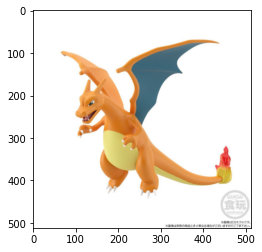

In [ ]:
img_show(original_image)
#img_show(style_image)

In [ ]:
#Defining a class that for the model
class VGG(nn.Module):
    def __init__(self):
        super(VGG,self).__init__()
        self.req_features= ['0','5','10','19','28'] 
        #Since we need only the 5 layers in the model so we will be dropping all the rest layers from the features of the model
        self.model=models.vgg19(pretrained=True).features[:29] #model will contain the first 29 layers

   
    #x holds the input tensor(image) that will be feeded to each layer
    def forward(self,x):
        #initialize an array that wil hold the activations from the chosen layers
        features=[]
        #Iterate over all the layers of the mode
        for layer_num,layer in enumerate(self.model):
            #activation of the layer will stored in x
            x=layer(x)
            #appending the activation of the selected layers and return the feature array
            if (str(layer_num) in self.req_features):
                features.append(x)
                
        return features

In [ ]:
# This is loss function of content
def calc_content_loss(gen_feat,orig_feat):
    #calculating the content loss of each layer by calculating the MSE between the content and generated features and adding it to content loss
    content_l=torch.mean((gen_feat-orig_feat)**2)
    return content_l

# This is loss function of style
def calc_style_loss(gen,style):
    #Calculating the gram matrix for the style and the generated image
    batch_size,channel,height,width=gen.shape

    G=torch.mm(gen.view(channel,height*width),gen.view(channel,height*width).t())
    A=torch.mm(style.view(channel,height*width),style.view(channel,height*width).t())
        
    #Calcultating the style loss of each layer by calculating the MSE between the gram matrix of the style image and the generated image and adding it to style loss
    style_l=torch.mean((G-A)**2)
    return style_l

In [ ]:
# This is total loss function : loss_content + loss_style
def calculate_loss(gen_features, orig_feautes, style_featues):
    style_loss=content_loss=0
    for gen,cont,style in zip(gen_features,orig_feautes,style_featues):
        #extracting the dimensions from the generated image
        content_loss+=calc_content_loss(gen,cont)
        style_loss+=calc_style_loss(gen,style)
    
    #calculating the total loss of e th epoch
    total_loss=A*content_loss + B*style_loss 
    return total_loss

Epoch: 0, Loss: 10935798784.0


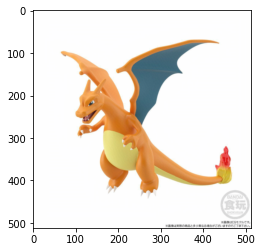

Epoch: 100, Loss: 1706894720.0
Epoch: 200, Loss: 1058110272.0
Epoch: 300, Loss: 740292544.0
Epoch: 400, Loss: 544119488.0
Epoch: 500, Loss: 431584608.0


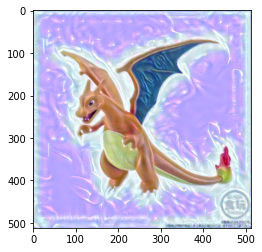

Epoch: 600, Loss: 356737888.0
Epoch: 700, Loss: 303315520.0
Epoch: 800, Loss: 262891312.0
Epoch: 900, Loss: 231205072.0
Epoch: 1000, Loss: 205461104.0


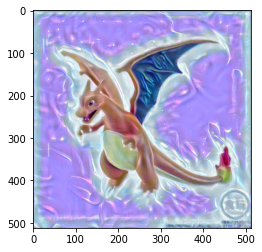

Epoch: 1100, Loss: 183955392.0
Epoch: 1200, Loss: 165604672.0
Epoch: 1300, Loss: 149667248.0
Epoch: 1400, Loss: 135564560.0
Epoch: 1500, Loss: 123042632.0


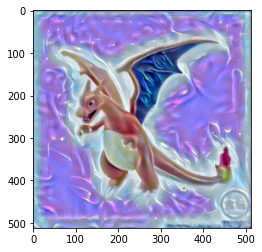

Epoch: 1600, Loss: 111784992.0
Epoch: 1700, Loss: 101592928.0
Epoch: 1800, Loss: 92384880.0
Epoch: 1900, Loss: 84213840.0
Epoch: 2000, Loss: 76765408.0


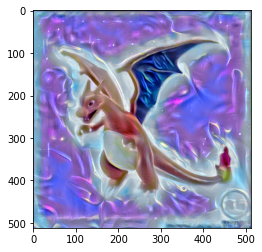

Epoch: 2100, Loss: 70215592.0
Epoch: 2200, Loss: 64576684.0
Epoch: 2300, Loss: 58920104.0
Epoch: 2400, Loss: 54103460.0
Epoch: 2500, Loss: 49809496.0


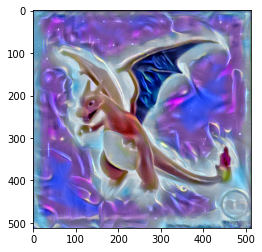

Epoch: 2600, Loss: 45997296.0
Epoch: 2700, Loss: 42650644.0
Epoch: 2800, Loss: 39528736.0
Epoch: 2900, Loss: 36726968.0
Epoch: 3000, Loss: 34365684.0


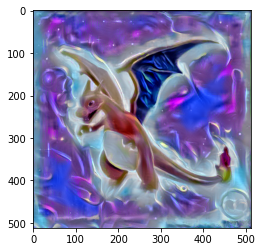

Epoch: 3100, Loss: 32041386.0
Epoch: 3200, Loss: 30063614.0
Epoch: 3300, Loss: 28387630.0
Epoch: 3400, Loss: 26857568.0
Epoch: 3500, Loss: 25262978.0


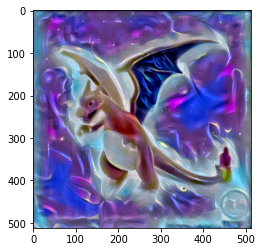

Epoch: 3600, Loss: 23927698.0
Epoch: 3700, Loss: 22814248.0
Epoch: 3800, Loss: 21858686.0
Epoch: 3900, Loss: 20834040.0
Epoch: 4000, Loss: 19889106.0


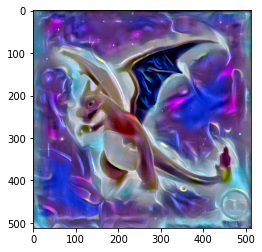

Epoch: 4100, Loss: 19162546.0
Epoch: 4200, Loss: 18131824.0
Epoch: 4300, Loss: 17475126.0
Epoch: 4400, Loss: 16695017.0
Epoch: 4500, Loss: 16301453.0


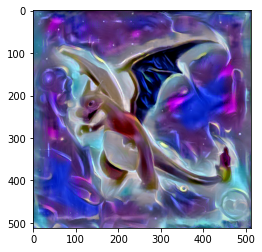

Epoch: 4600, Loss: 15563055.0
Epoch: 4700, Loss: 15137207.0
Epoch: 4800, Loss: 14510769.0
Epoch: 4900, Loss: 14103898.0
Epoch: 5000, Loss: 13530097.0


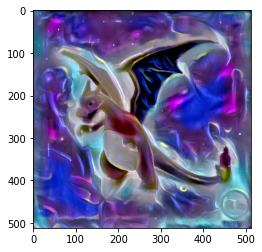

Epoch: 5100, Loss: 13631164.0
Epoch: 5200, Loss: 12971434.0
Epoch: 5300, Loss: 12231685.0
Epoch: 5400, Loss: 12024601.0
Epoch: 5500, Loss: 11553602.0


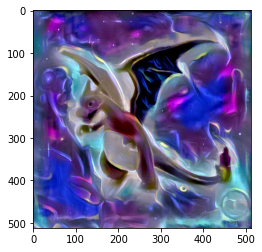

Epoch: 5600, Loss: 11185092.0
Epoch: 5700, Loss: 10847107.0
Epoch: 5800, Loss: 10667903.0
Epoch: 5900, Loss: 10359862.0
Epoch: 6000, Loss: 10598405.0


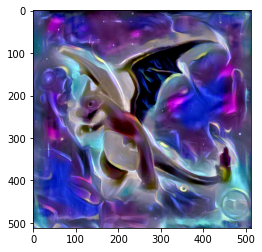

Epoch: 6100, Loss: 10488719.0
Epoch: 6200, Loss: 9515477.0
Epoch: 6300, Loss: 9333226.0
Epoch: 6400, Loss: 9329748.0
Epoch: 6500, Loss: 8784825.0


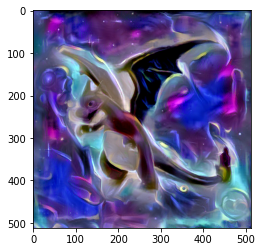

Epoch: 6600, Loss: 8894255.0
Epoch: 6700, Loss: 8424038.0
Epoch: 6800, Loss: 8489626.0
Epoch: 6900, Loss: 8147436.5


In [ ]:
#Load the model to the GPU
model=VGG().to(device).eval() 

#initialize the paramerters required for fitting the model
epoch=7000
lr=0.0025
A=8
B=70

#using adam optimizer and it will update the generated image not the model parameter 
optimizer=optim.Adam([generated_image],lr=lr)

#iterating for 1000 times
for e in range (epoch):
    #extracting the features of generated, content and the original required for calculating the loss
    gen_features=model(generated_image)
    orig_feautes=model(original_image)
    style_featues=model(style_image)
    
    #iterating over the activation of each layer and calculate the loss and add it to the content and the style loss
    total_loss=calculate_loss(gen_features, orig_feautes, style_featues)
    #optimize the pixel values of the generated image and backpropagate the loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    #print the image and save it after each 100 epoch
    if e%100 == 0:
        print("Epoch: {}, Loss: {}".format(e,total_loss))
        
        save_image(generated_image,"test4.png") 
    if e%500 == 0:
      img_show(generated_image)